In [1]:
import pandas as pd
import os

# define folder path
folder_path = r"C:\Users\matts\Documents\Empirical Project\EmpiricalProject-720005462\LeagueData"

#list to store individual DataFrames for each CSV file
dfs = []

#for loop to iterate over every file
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        #read the CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path)
        dfs.append(df)

#merge all DataFrames stored in the list
merged_df = pd.concat(dfs, ignore_index=True)

print(merged_df)

     Position            Club Name  Points  Goals For   Season
0           1    Manchester United      84         67  1992/93
1           2          Aston Villa      74         57  1992/93
2           3         Norwich City      72         61  1992/93
3           4     Blackburn Rovers      71         68  1992/93
4           5  Queens Park Rangers      63         63  1992/93
..        ...                  ...     ...        ...      ...
621        16    Nottingham Forest      38         38  2022/23
622        17              Everton      36         34  2022/23
623        18       Leicester City      34         51  2022/23
624        19         Leeds United      31         48  2022/23
625        20          Southampton      25         36  2022/23

[626 rows x 5 columns]


In [2]:
#counts how many seasons each club has played in
club_counts = merged_df['Club Name'].value_counts()

#create df from the value counts
club_counts_df = pd.DataFrame({'Club Name': club_counts.index, 'No. Seasons': club_counts.values})

#creates a rank for each of the teams
club_counts_df = club_counts_df.sort_values(by='No. Seasons', ascending=False)
club_counts_df['Rank'] = club_counts_df['No. Seasons'].rank(method='dense', ascending=False)
club_counts_df['Rank'] = club_counts_df['Rank'].astype(int)

print(club_counts_df)

                   Club Name  No. Seasons  Rank
0          Manchester United           31     1
2                  Liverpool           31     1
3          Tottenham Hotspur           31     1
4                    Arsenal           31     1
5                    Chelsea           31     1
1                    Everton           31     1
6                Aston Villa           28     2
7           Newcastle United           28     2
8            West Ham United           27     3
9            Manchester City           26     4
10               Southampton           24     5
11          Blackburn Rovers           18     6
12            Leicester City           17     7
14                    Fulham           16     8
13                Sunderland           16     8
15              Leeds United           15     9
16             Middlesbrough           15     9
17            Crystal Palace           14    10
18      West Bromwich Albion           13    11
19          Bolton Wanderers           1

In [3]:
#have a look at this but creates a more 'visual' table
styled_df = club_counts_df.reset_index(drop=True).style

# Apply some styling to the DataFrame
styled_df = styled_df.set_properties(**{
    'text-align': 'center',
    'font-size': '12pt',
    'border': '1px solid black'
})

# Apply color to alternate rows
styled_df = styled_df.set_table_styles([
    {
        'selector': 'tr:nth-of-type(odd)',
        'props': [
            ('background-color', 'lightblue')
        ]
    },
    {
        'selector': 'th',
        'props': [
            ('text-align', 'center'),
            ('font-size', '14pt'),
            ('border', '1px solid black'),
            ('background-color', 'lightgray')
        ]
    }
])

# Render the styled DataFrame
styled_df

,Club Name,No. Seasons,Rank
0,Manchester United,31,1
1,Liverpool,31,1
2,Tottenham Hotspur,31,1
3,Arsenal,31,1
4,Chelsea,31,1
5,Everton,31,1
6,Aston Villa,28,2
7,Newcastle United,28,2
8,West Ham United,27,3
9,Manchester City,26,4


In [4]:
#pivot df to have club names as rows and seasons as columns
complete_seasons = merged_df.pivot(index='Club Name', columns='Season', values='Position')

# Show the resulting DataFrame
print(complete_seasons)

Season                    1992/93  1993/94  1994/95  1995/96  1996/97  \
Club Name                                                               
Arsenal                      10.0      4.0     12.0      5.0      3.0   
Aston Villa                   2.0     10.0     18.0      4.0      5.0   
Barnsley                      NaN      NaN      NaN      NaN      NaN   
Birmingham City               NaN      NaN      NaN      NaN      NaN   
Blackburn Rovers              4.0      2.0      1.0      7.0     13.0   
Blackpool                     NaN      NaN      NaN      NaN      NaN   
Bolton Wanderers              NaN      NaN      NaN     20.0      NaN   
Bournemouth                   NaN      NaN      NaN      NaN      NaN   
Bradford City                 NaN      NaN      NaN      NaN      NaN   
Brentford                     NaN      NaN      NaN      NaN      NaN   
Brighton and Hove Albion      NaN      NaN      NaN      NaN      NaN   
Burnley                       NaN      NaN      NaN

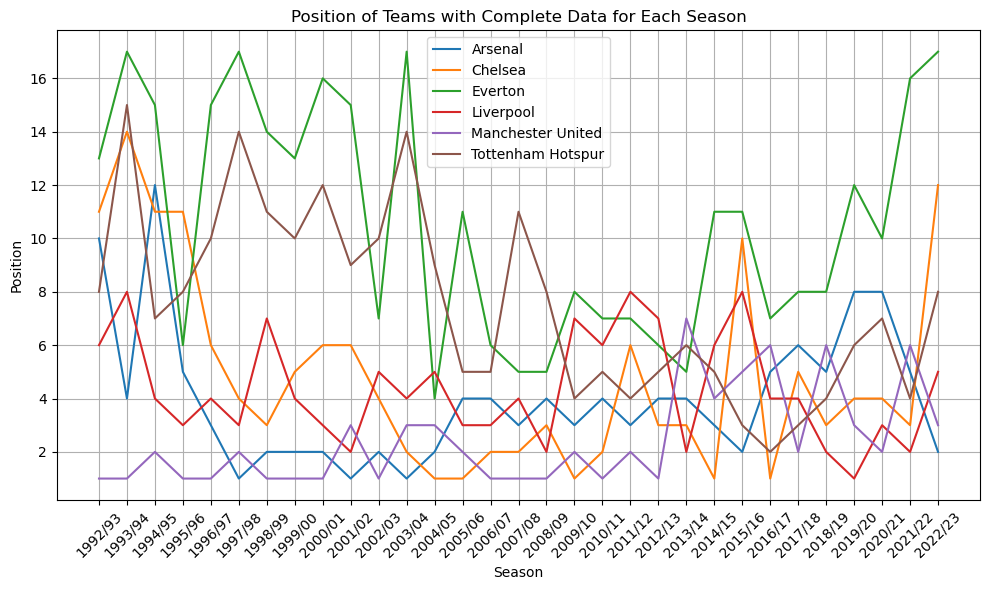

In [5]:
import matplotlib.pyplot as plt

#filter teams with complete data for each season
complete_data_teams = complete_seasons[complete_seasons.notna().all(axis=1)]

#plot data onto line graph
plt.figure(figsize=(10, 6))

for club in complete_data_teams.index:
    plt.plot(complete_seasons.columns, complete_data_teams.loc[club], label=club)

#add lables, legend, titles etc.
plt.xlabel('Season')
plt.ylabel('Position')
plt.title('Position of Teams with Complete Data for Each Season')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#calculate average position for each complete data team
average_position = complete_data_teams.mean(axis=1)

print("Average Position for Complete Data Teams:")
print(average_position)

Average Position for Complete Data Teams:
Club Name
Arsenal               4.000000
Chelsea               4.838710
Everton              10.612903
Liverpool             4.354839
Manchester United     2.451613
Tottenham Hotspur     7.483871
dtype: float64


In [7]:
#create pivot df for position and season 
points_season = merged_df.pivot(index='Position', columns='Season', values='Points')

print(points_season)

Season    1992/93  1993/94  1994/95  1995/96  1996/97  1997/98  1998/99  \
Position                                                                  
1            84.0     92.0     89.0     82.0     75.0     78.0     79.0   
2            74.0     84.0     88.0     78.0     68.0     77.0     78.0   
3            72.0     77.0     77.0     71.0     68.0     65.0     75.0   
4            71.0     71.0     74.0     63.0     68.0     63.0     67.0   
5            63.0     70.0     73.0     63.0     61.0     59.0     57.0   
6            59.0     65.0     72.0     61.0     59.0     58.0     55.0   
7            59.0     64.0     62.0     61.0     57.0     57.0     54.0   
8            59.0     60.0     60.0     61.0     56.0     56.0     52.0   
9            57.0     60.0     56.0     58.0     47.0     55.0     51.0   
10           56.0     57.0     54.0     51.0     46.0     53.0     49.0   
11           56.0     56.0     54.0     50.0     46.0     52.0     47.0   
12           54.0     53.

In [8]:
#group by position and calculate average, maximum, and minimum points for each position
position_stats = points_season.agg(['mean', 'max', 'min'], axis=1)

#rename columns
position_stats.columns = ['Average Points', 'Maximum Points', 'Minimum Points']

print(position_stats)

          Average Points  Maximum Points  Minimum Points
Position                                                
1              87.677419           100.0            75.0
2              80.612903            97.0            68.0
3              73.741935            83.0            65.0
4              69.225806            79.0            60.0
5              65.193548            75.0            56.0
6              61.741935            72.0            55.0
7              58.193548            64.0            53.0
8              54.838710            61.0            46.0
9              52.580645            60.0            46.0
10             50.322581            59.0            44.0
11             48.612903            56.0            44.0
12             46.806452            54.0            42.0
13             45.032258            53.0            40.0
14             43.548387            52.0            38.0
15             42.225806            52.0            38.0
16             40.580645       

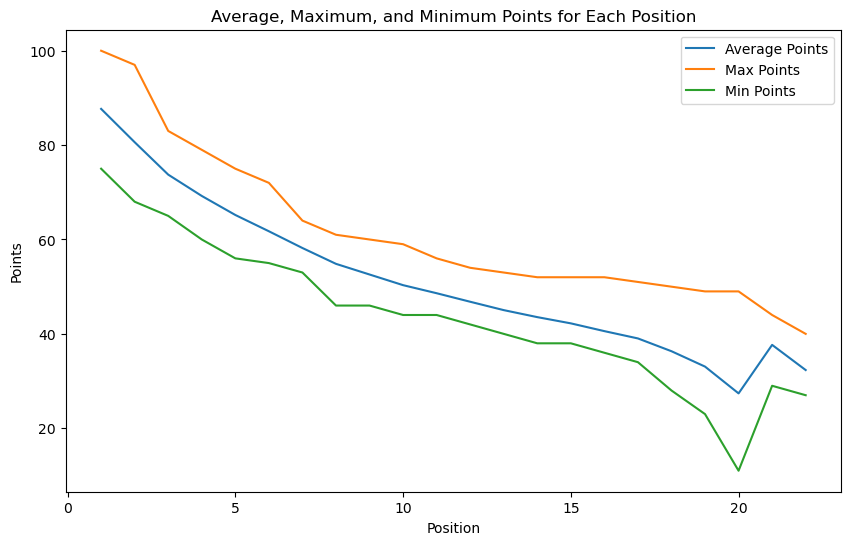

In [9]:
#create graph to show data in position_stats

plt.figure(figsize=(10, 6))

#plot data
plt.plot(position_stats.index, position_stats['Average Points'], label='Average Points')
plt.plot(position_stats.index, position_stats['Maximum Points'], label='Max Points')
plt.plot(position_stats.index, position_stats['Minimum Points'], label='Min Points')

#add labels and legend
plt.xlabel('Position')
plt.ylabel('Points')
plt.title('Average, Maximum, and Minimum Points for Each Position')
plt.legend()

plt.show()

In [10]:
#create pivot df for position and season 
goals_season = merged_df.pivot(index='Position', columns='Season', values='Goals For')

print(goals_season)

Season    1992/93  1993/94  1994/95  1995/96  1996/97  1997/98  1998/99  \
Position                                                                  
1            67.0     80.0     80.0     73.0     76.0     68.0     80.0   
2            57.0     63.0     77.0     66.0     73.0     73.0     59.0   
3            61.0     82.0     72.0     70.0     62.0     68.0     57.0   
4            68.0     53.0     65.0     52.0     62.0     71.0     62.0   
5            63.0     65.0     59.0     49.0     47.0     57.0     46.0   
6            62.0     56.0     67.0     64.0     58.0     57.0     51.0   
7            55.0     76.0     66.0     61.0     50.0     49.0     68.0   
8            60.0     59.0     61.0     50.0     49.0     56.0     40.0   
9            56.0     62.0     48.0     50.0     46.0     52.0     48.0   
10           40.0     46.0     61.0     43.0     44.0     51.0     40.0   
11           51.0     43.0     50.0     46.0     28.0     46.0     47.0   
12           56.0     65.

In [11]:
#group by position and calculate average, maximum, and minimum points for each position
position_stats_2 = goals_season.agg(['mean', 'max', 'min'], axis=1)

#rename columns
position_stats_2.columns = ['Average Points', 'Maximum Points', 'Minimum Points']

print(position_stats_2)

          Average Points  Maximum Points  Minimum Points
Position                                                
1              82.290323           106.0            67.0
2              75.709677           102.0            57.0
3              68.290323            87.0            57.0
4              65.387097            84.0            45.0
5              59.193548            77.0            46.0
6              58.516129            74.0            46.0
7              54.903226            76.0            36.0
8              51.870968            70.0            40.0
9              49.064516            62.0            38.0
10             46.935484            61.0            38.0
11             45.935484            66.0            28.0
12             46.290323            65.0            35.0
13             42.774194            59.0            31.0
14             43.741935            56.0            29.0
15             42.580645            58.0            32.0
16             41.741935       

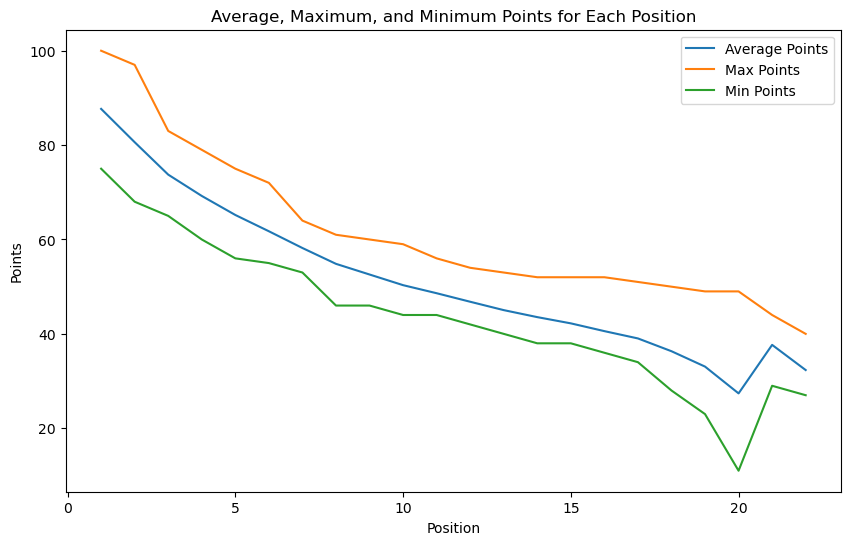

In [12]:
#create graph to show data in position_stats

plt.figure(figsize=(10, 6))

#plot data
plt.plot(position_stats_2.index, position_stats['Average Points'], label='Average Points')
plt.plot(position_stats_2.index, position_stats['Maximum Points'], label='Max Points')
plt.plot(position_stats_2.index, position_stats['Minimum Points'], label='Min Points')

#add labels and legend
plt.xlabel('Position')
plt.ylabel('Points')
plt.title('Average, Maximum, and Minimum Points for Each Position')
plt.legend()

plt.show()